I am attempting to see which supervised learning model has the best predictive accuracy for determining the price of the houses. Models that deal with regression need to be used for prediction. The models we'll attempt to use are:
* Linear Regression
* Support Vector Regression
* KNN Regression
* Random Forest Regression

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from sklearn import linear_model
import seaborn as sns
%matplotlib inline

In [2]:
# .fillna can be used to fill NaNs
# think about what to do with your NaN and what they might mean
housing = pd.read_csv('housing.csv')
housing.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price             7610
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
dtype: int64

There is a lot of missing data. But due to time constraints we will simply be dropping any unavailable data. 

(It is important to note that missing data can be just as important as data that is present and there are different solutions to dealing with it.)

In [3]:
# drop all NaNs in other columns
housing = housing.dropna()

In [4]:
# remove all outliers in the price column
housing[np.abs(housing.Price-housing.Price.mean())<=(3*housing.Price.std())] 
housing = housing[~(np.abs(housing.Price-housing.Price.mean())>(3*housing.Price.std()))]

In [5]:
# We've reduced the size quite a bit. But >11,000 items still
# takes quite a while for my laptop to compute
# I'll be taking a sample of 1/4 of the data to save time
sample = int(11517/4)
housing = housing.sample(n=sample)

In [6]:
housing.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
13378,Ormond,6/16 Walsh St,2,u,437500.0,S,Woodards,8/04/2017,11.8,3204.0,...,1.0,1.0,0.0,74.0,1970.0,Glen Eira City Council,-37.90230,145.04610,Southern Metropolitan,3578.0
14220,Travancore,456/38 Mt Alexander Rd,2,u,360000.0,SP,Pagan,20/05/2017,5.3,3032.0,...,1.0,1.0,0.0,51.0,2010.0,Moonee Valley City Council,-37.78470,144.93830,Western Metropolitan,1052.0
29961,Wantirna,4 Kellaway Ct,4,h,1188888.0,S,Barry,6/01/2018,14.7,3152.0,...,3.0,3.0,960.0,264.0,1990.0,Knox City Council,-37.85143,145.23157,Eastern Metropolitan,5424.0
27395,Vermont South,3 Ryrie Pl,4,h,1320000.0,S,Barry,11/11/2017,17.2,3133.0,...,2.0,2.0,790.0,172.0,1972.0,Whitehorse City Council,-37.86080,145.18420,Eastern Metropolitan,4280.0
2877,Carlton North,112 Newry St,4,h,1425000.0,S,Nelson,4/03/2017,3.2,3054.0,...,3.0,0.0,122.0,130.0,1890.0,Melbourne City Council,-37.78930,144.96960,Northern Metropolitan,3106.0


In [7]:
# substantially increase the number of features
housing = pd.get_dummies(housing)

In [8]:
# choose our x and y
y = housing['Price']
X = housing.drop(['Price'], 1)

In [9]:
# using random forest to determine which features are most important
from sklearn import ensemble
from sklearn.model_selection import cross_val_score

rfr = ensemble.RandomForestRegressor()

In [10]:
# create a chart showing the most important features
df = pd.DataFrame()
df['importance'] = rfr.fit(X, y).feature_importances_
df = df.sort_values(by='importance', ascending = False)
df2 = df[:100]
df2 = df2.reset_index(drop=True)
df.head()

,importance
7,0.302877
8,0.162624
3463,0.139867
1,0.089026
10,0.043018


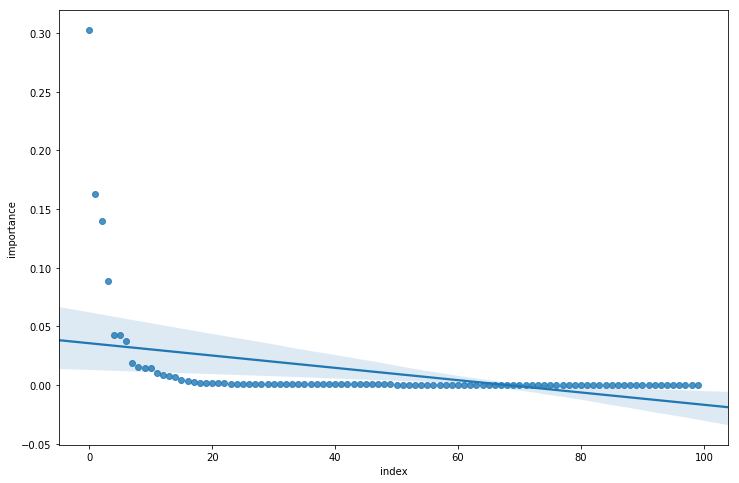

In [11]:
#create a graph showing the most important features
plt.subplots(figsize=(12,8))
sns.regplot(data = df2.reset_index(), x = 'index', y = 'importance')

In [12]:
# turn index into a list and select the 30 most important columns/features
df = df[:20]
df_list = df.index.T.tolist()
X2 = pd.DataFrame()
X2 = X.iloc[:, df_list]
X = X2

In [13]:
X.head()

,BuildingArea,YearBuilt,Regionname_Southern Metropolitan,Distance,Longtitude,Lattitude,Landsize,Type_h,Type_u,Postcode,Regionname_Eastern Metropolitan,Propertycount,Rooms,Bedroom2,Bathroom,Car,CouncilArea_Glen Eira City Council,CouncilArea_Boroondara City Council,Address_39 Sandpiper Pl,SellerG_Collins
13378,74.0,1970.0,1,11.8,145.04610,-37.90230,0.0,0,1,3204.0,0,3578.0,2,2.0,1.0,1.0,1,0,0,0
14220,51.0,2010.0,0,5.3,144.93830,-37.78470,0.0,0,1,3032.0,0,1052.0,2,2.0,1.0,1.0,0,0,0,0
29961,264.0,1990.0,0,14.7,145.23157,-37.85143,960.0,1,0,3152.0,1,5424.0,4,4.0,3.0,3.0,0,0,0,0
27395,172.0,1972.0,0,17.2,145.18420,-37.86080,790.0,1,0,3133.0,1,4280.0,4,4.0,2.0,2.0,0,0,0,0
2877,130.0,1890.0,0,3.2,144.96960,-37.78930,122.0,1,0,3054.0,0,3106.0,4,4.0,3.0,0.0,0,0,0,0


In [14]:
#instantiate model
regr = linear_model.LinearRegression()

#fit model to data
regr.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [15]:
cross_val_score(regr, X, y, cv=10)

array([0.68693757, 0.7032721 , 0.70913381, 0.69407002, 0.6406585 ,
       0.7172006 , 0.57959471, 0.70223276, 0.67897007, 0.68876312])

In [16]:
print('R-squared:')
regr.score(X,y)

R-squared:


0.7019640031158298

Our accuracy for linear regression is pretty decent. We'll have to check to see if any other models perform even better.

In [17]:
from sklearn.svm import SVR

svm = SVR()
svm.fit(X, y)

score = cross_val_score(svm, X, y, cv=5)

In [18]:
svm.score(X, y)

-0.075742873411073

Support Vector Regression is horrible, in the negatives even. Perhaps I did something wrong.

In [19]:
from sklearn import neighbors

knn = neighbors.KNeighborsRegressor(n_neighbors=10)

knn.fit(X, y)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=10, p=2,
          weights='uniform')

In [20]:
knn_w = neighbors.KNeighborsRegressor(n_neighbors=10, weights='distance')

knn_w.fit(X, y)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=10, p=2,
          weights='distance')

In [21]:
score = cross_val_score(knn, X, y, cv=5)
print("Unweighted Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))
score_w = cross_val_score(knn_w, X, y, cv=5)
print("Weighted Accuracy: %0.2f (+/- %0.2f)" % (score_w.mean(), score_w.std() * 2))

Unweighted Accuracy: 0.50 (+/- 0.05)
Weighted Accuracy: 0.56 (+/- 0.05)


While the weighted KNN regression did perform better than the unweighted, both models did not perform well.

In [22]:
score = cross_val_score(rfr, X, y, cv=10)
cross_val_score(rfr, X, y, cv=10)

array([0.84167313, 0.80586925, 0.82353544, 0.80666001, 0.81064281,
       0.80558722, 0.81256486, 0.7443236 , 0.78144636, 0.81416713])

In [23]:
print('RFR Score:')
print(score.mean())

RFR Score:
0.8074603099142015


Random Forest Regressor seems to have performed the best.

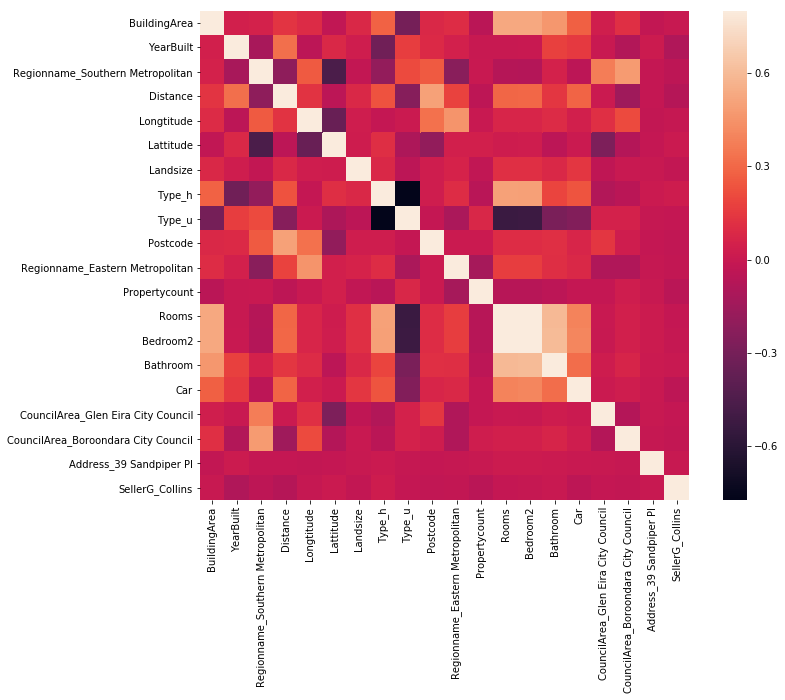

In [24]:
corrmat = X.corr()

# Set up the matplotlib figure.
f, ax = plt.subplots(figsize=(12, 9))

# Draw the heatmap using seaborn
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

In [25]:
X['Rooms_times_Bedroom2'] = X['Rooms']*X['Bedroom2']
X['Rooms_times_BuildingArea'] = X['Rooms']*X['BuildingArea']
X['Bedroom2_times_BuildingArea'] = X['Bedroom2']*X['BuildingArea']
X['Bedroom2_times_Bathroom'] = X['Bedroom2']*X['Bathroom']

In [26]:
score = cross_val_score(rfr, X, y, cv=10)
cross_val_score(rfr, X, y, cv=10)

array([0.83220613, 0.79804967, 0.79511275, 0.79011877, 0.8259214 ,
       0.82968501, 0.78524653, 0.77108469, 0.77863144, 0.81630644])

In [27]:
print('RFR Score:')
print(score.mean())

RFR Score:
0.8008910129179915


My attempt to improve the RFR actually slightly worsened my accuracy. But the accuracy was already good (80%).